# Importing Libraries

In [1]:
# Visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#Data Preprocessing and Feature Scaling
from sklearn.preprocessing import StandardScaler
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Cross Validation and Hyper Tuning
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning

# ROC Curve & Confusion Matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#pickle
import pickle

# 1. Data Collection

In [2]:
# Data Load Path
df = pd.read_csv('creditcard.csv')

In [3]:
print('Rows and columns of the data: ',df.shape)

Rows and columns of the data:  (284807, 31)


In [4]:
print("5 rows of the Data: ",df.head())

5 rows of the Data:     Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

# 2. Data Cleaning

In [5]:
# Handle Missing Values
print("Null Values: ",df.isna().sum())

Null Values:  Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
counts=df['Class'].value_counts()
counts

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
#Dropping Duplicates and Columns
da = df.drop_duplicates()
count = da['Class'].value_counts()
count

Class
0    283253
1       473
Name: count, dtype: int64

# 3. Exploratory Data Analysis

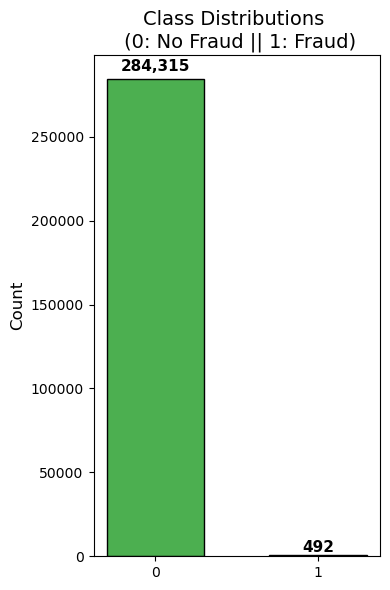

In [8]:
# Bar Plot Before Removing Duplicates
colors = ['#4CAF50', '#F44336']  # green & red
plt.figure(figsize=(4,6))
bars = plt.bar(counts.index, counts.values, color=colors, width=0.6, edgecolor='black')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
# plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X position
        height + (0.01 * height),          # Y position
        f'{int(height):,}',                # format count with commas
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )
plt.xticks([0, 1], ['0', '1'])
plt.grid(False)
plt.tight_layout()
plt.show()


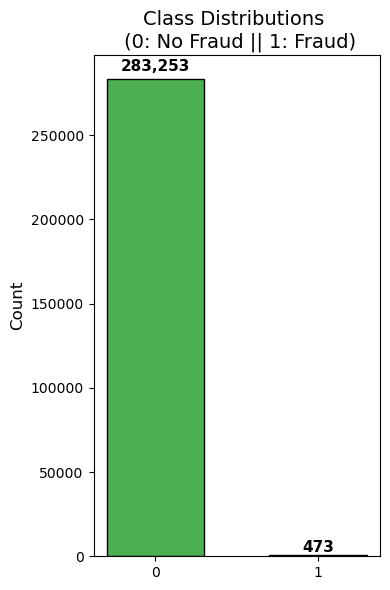

In [9]:
# Bar Plot After Removing Duplicates
colors = ['#4CAF50', '#F44336']  # green & red
plt.figure(figsize=(4,6))
bars = plt.bar(count.index, count.values, color=colors, width=0.6, edgecolor='black')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.ylabel('Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X position
        height + (0.01 * height),          # Y position
        f'{int(height):,}',                # format count with commas
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )
plt.xticks([0, 1], ['0', '1'])
plt.grid(False)
plt.tight_layout()
plt.show()

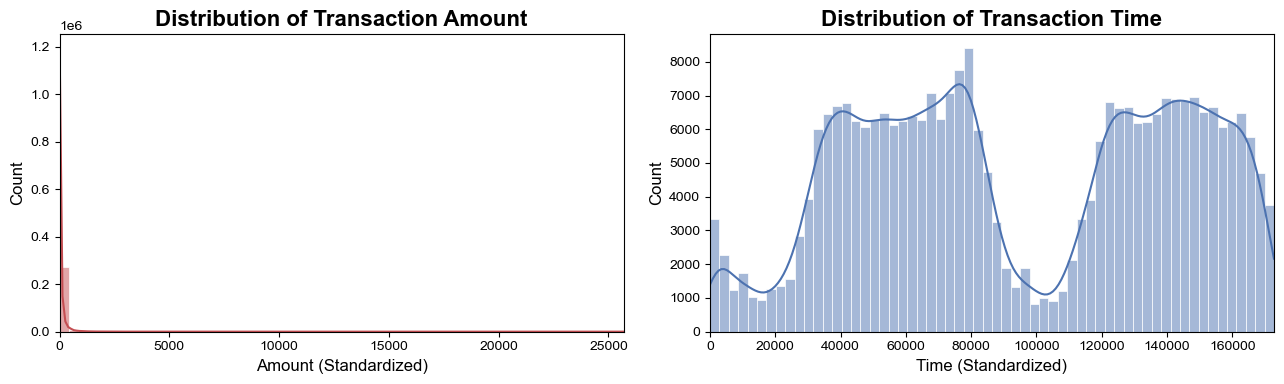

In [10]:
#  Histogram Plot
# Distribution of Transaction Time and Amount
fig, ax = plt.subplots(1, 2, figsize=(13,4))
sns.set(style="whitegrid")
# Transaction Amount
sns.histplot(df['Amount'], bins=60, kde=True, color='r', ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Amount (Standardized)', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_xlim(df['Amount'].min(), df['Amount'].max())
# Transaction Time
sns.histplot(df['Time'], bins=60, kde=True, color='b', ax=ax[1])
ax[1].set_title('Distribution of Transaction Time', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Time (Standardized)', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_xlim(df['Time'].min(), df['Time'].max())
plt.tight_layout()
plt.show()

In [11]:
#Using Feature Scaling
# sc = StandardScaler()
# df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']).values.reshape(-1,1))
# df['Time'] = sc.fit_transform(pd.DataFrame(df['Time']).values.reshape(-1,1))

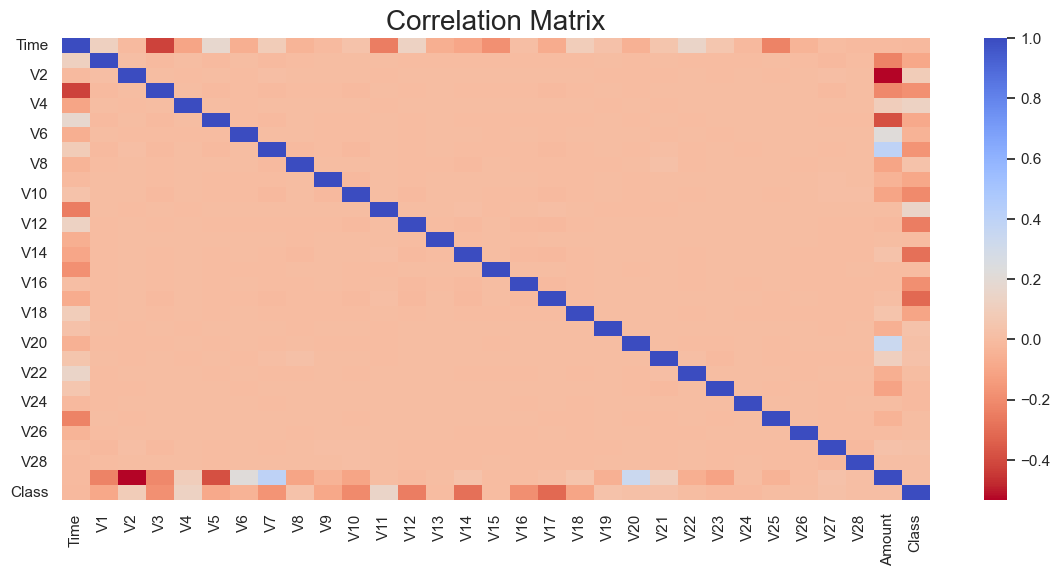

In [12]:
# Correlation Matrice of Imbalanced Data
plt.figure(figsize=(14,6))
corr = da.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [13]:
# Under Sampling
# Balancing the Dataset
nor = da[da['Class'] == 0]
fra = da[da['Class'] == 1]
normal = nor.sample(n=800)
fraud = fra.sample(n=800, replace=True)
new = pd.concat([normal, fraud], ignore_index=True)
cou = new['Class'].value_counts()

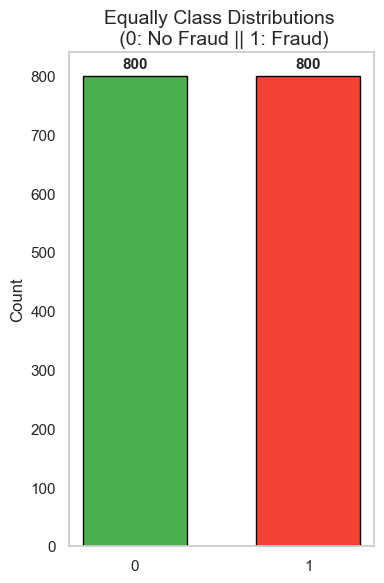

In [14]:
#  Bar Plot After Balancing the Dataset
colors = ['#4CAF50', '#F44336']  # green & red
plt.figure(figsize=(4,6))
bars = plt.bar(cou.index, cou.values, color=colors, width=0.6, edgecolor='black')
plt.title('Equally Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.ylabel('Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X position
        height + (0.01 * height),          # Y position
        f'{int(height):,}',                # format count with commas
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )
plt.xticks([0, 1], ['0', '1'])
plt.grid(False)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sample Correlation Matrix')

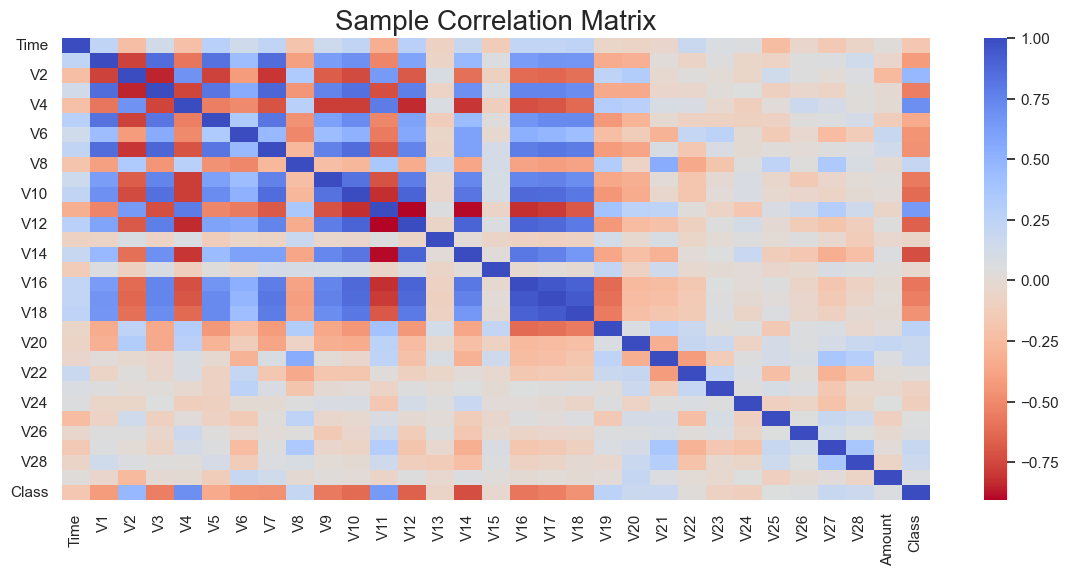

In [15]:
# Correlation Matrice Of Balanced Data
plt.figure(figsize=(14,6))
sample_corr = new.corr()
sns.heatmap(sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Sample Correlation Matrix', fontsize=20)

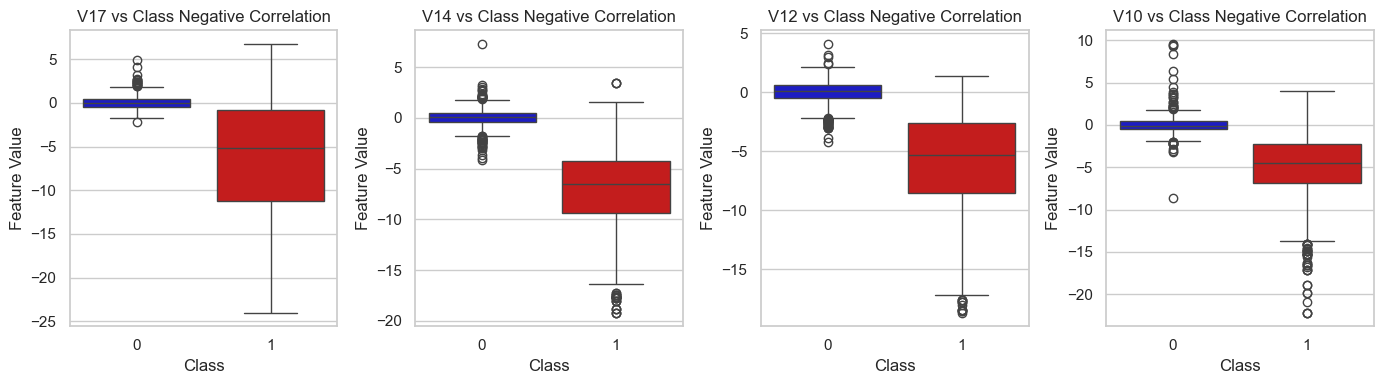

In [16]:
# Negative Correlation Subplots
f, axes = plt.subplots(ncols=4, figsize=(14,4))
colors = ["#0101DF", "#DF0101"]
features = ["V17", "V14", "V12", "V10"]
for i, feature in enumerate(features):
    sns.boxplot(x="Class", y=feature, hue="Class", data=new, palette=colors, ax=axes[i], dodge=False)
    axes[i].set_title(f'{feature} vs Class Negative Correlation')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Feature Value')
    axes[i].legend_.remove() 
plt.tight_layout()
plt.show()

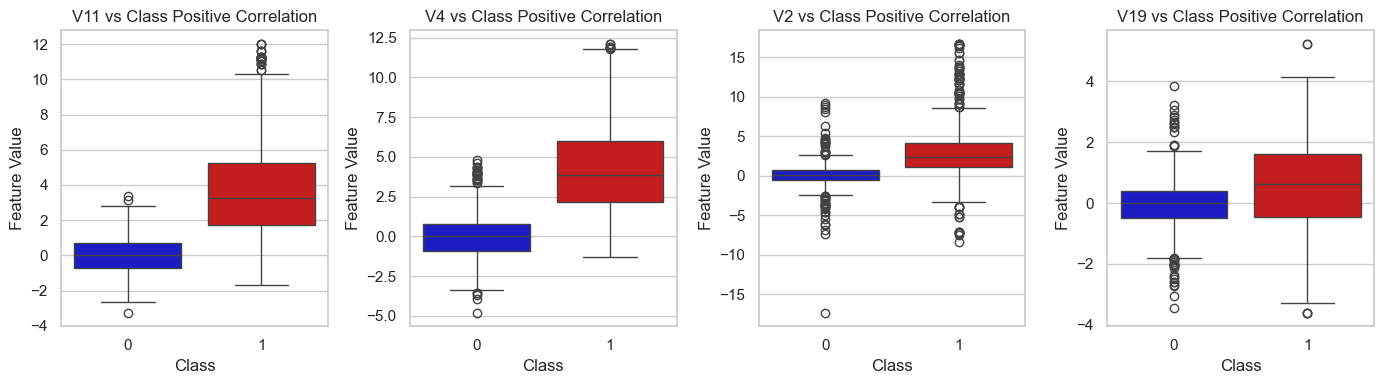

In [17]:
# Positive Correlation Subplots
f, axes = plt.subplots(ncols=4, figsize=(14,4))
colors = ["#0101DF", "#DF0101"]
features = ["V11", "V4", "V2", "V19"]
for i, feature in enumerate(features):
    sns.boxplot(x="Class", y=feature, hue="Class", data=new, palette=colors, ax=axes[i], dodge=False)
    axes[i].set_title(f'{feature} vs Class Positive Correlation')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Feature Value')
    axes[i].legend_.remove() 
plt.tight_layout()
plt.show()

T-SNE took 5.5 s
PCA took 0.019 s


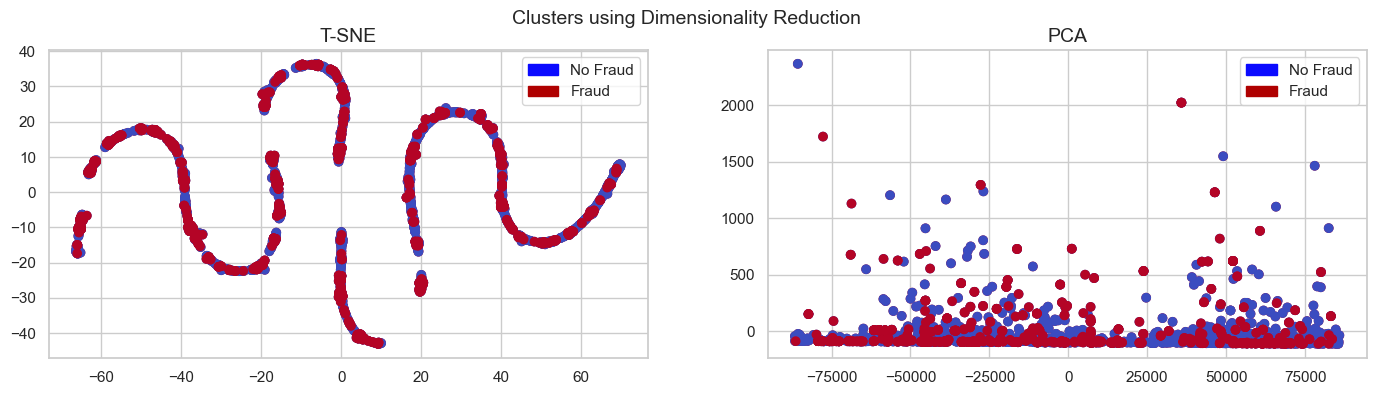

In [18]:
# T-SNE & PCA Scatter Subplots
# Declaring Independent and Dependent Variables
X = new.drop('Class', axis=1)
y = new['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# Subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,4))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=1)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=1)
ax1.set_title('T-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=1)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=1)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])
plt.show()

# 4. Model Selection and Training

In [19]:
# Training and Testing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [20]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
classifier = {
    "Logistic Regression": LogisticRegression(solver = 'saga', max_iter=5000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}
results = []
# Train and evaluate each classifier
for name, clf in classifier.items():
    print(f"\n========== {name} ==========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Compute metrics
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    roc = roc_auc_score(y_test, y_pred) * 100
    # Append to list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc
    })
    # Print results
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc:.2f}")


========== Logistic Regression ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 63.12
Precision: 70.67
Recall: 35.57
F1 Score: 47.32
ROC AUC Score: 61.35

========== Random Forest ==========
Accuracy: 97.81
Precision: 97.97
Recall: 97.32
F1 Score: 97.64
ROC AUC Score: 97.78

========== SVM ==========
Accuracy: 55.62
Precision: 51.66
Recall: 73.15
F1 Score: 60.56
ROC AUC Score: 56.75

========== Decision Tree ==========
Accuracy: 95.62
Precision: 93.55
Recall: 97.32
F1 Score: 95.39
ROC AUC Score: 95.73

========== XGBoost ==========
Accuracy: 98.12
Precision: 97.99
Recall: 97.99
F1 Score: 97.99
ROC AUC Score: 98.12


## 4.1 Comparision Of Metrics

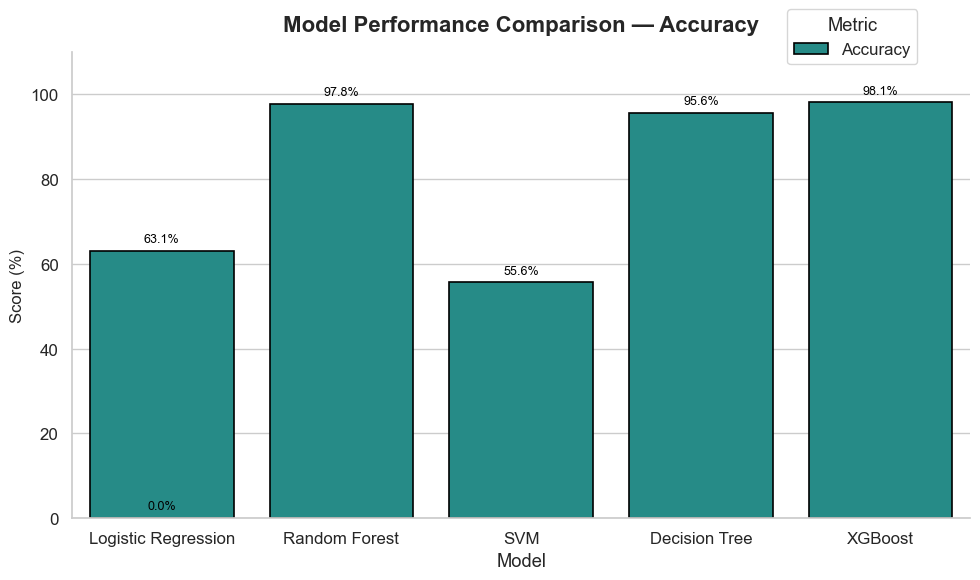

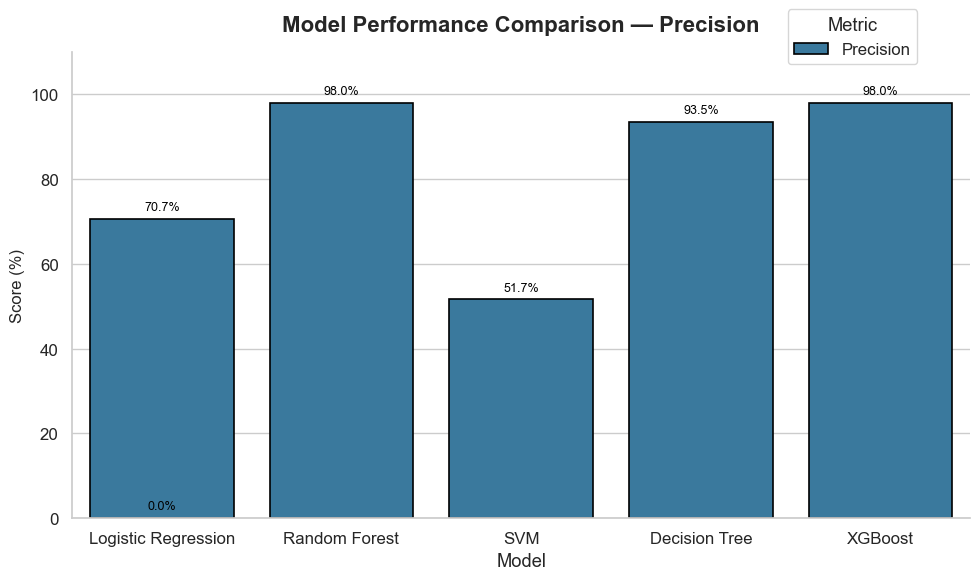

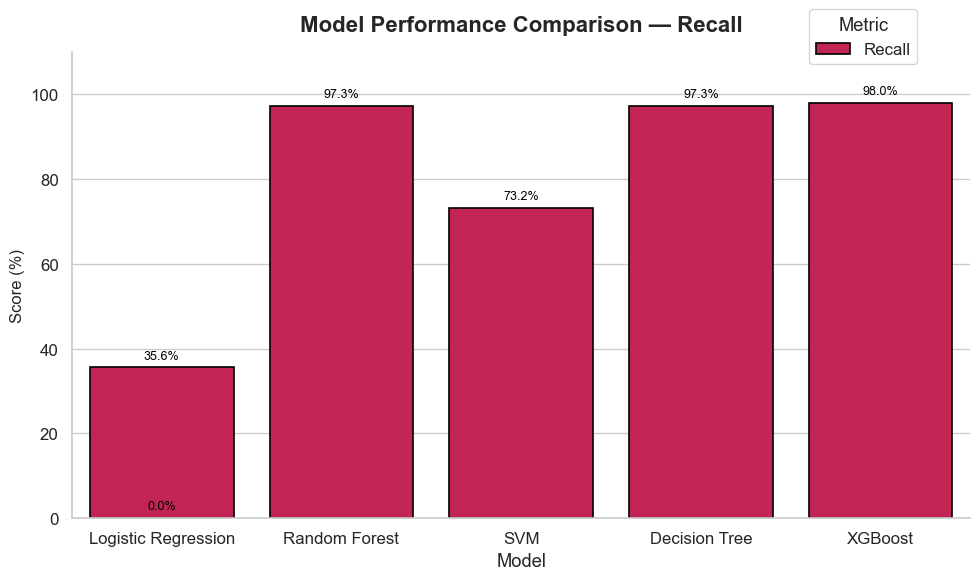

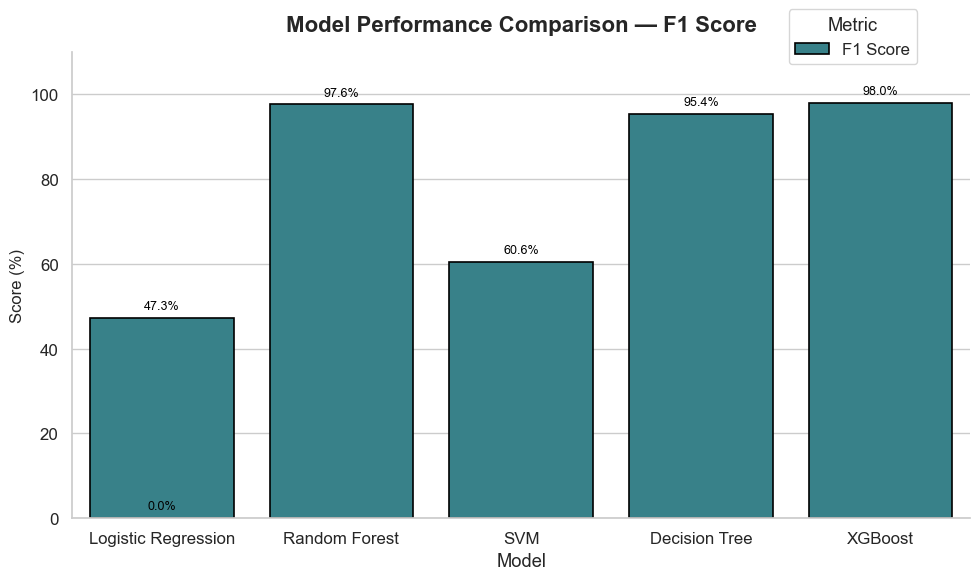

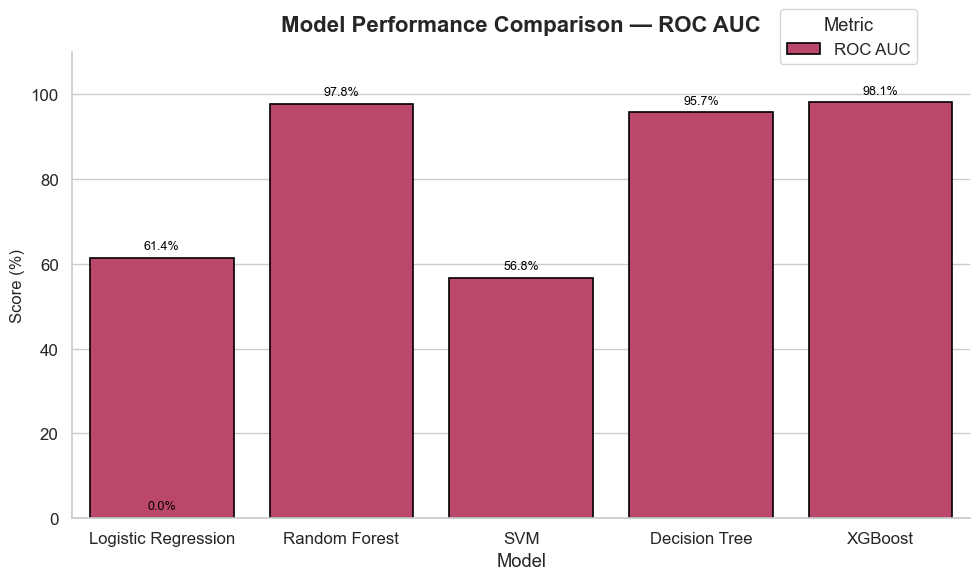

In [21]:
df_results = pd.DataFrame(results)
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
palettes = ["viridis", "mako", "rocket", "crest", "flare"]
sns.set_theme(style="whitegrid", font_scale=1.1)
# Loop through each metric and create an individual barplot
for metric, palette in zip(metrics, palettes):
    df_melted = df_results.melt(
        id_vars="Model", 
        value_vars=[metric],
        var_name="Metric", 
        value_name="Score"
    )
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x="Model", 
        y="Score", 
        hue="Metric", 
        data=df_melted,
        palette=palette,
        saturation=0.9,
        edgecolor="black",
        linewidth=1.2
    )
    # Title and axis formatting
    plt.title(f"Model Performance Comparison — {metric}", fontsize=16, fontweight='bold', pad=15)
    # plt.xlabel("Classifier Models", fontsize=12)
    plt.ylabel("Score (%)", fontsize=12)
    plt.ylim(0, 110)
    # plt.xticks(rotation=25, ha='right')
    plt.legend(title="Metric", loc='upper right',  bbox_to_anchor=(0.95, 1.11))
    # Add value labels above bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 4),
                    textcoords='offset points')
    sns.despine()
    plt.tight_layout()
    plt.show()

## 4.2 Cross Validation By Grid Search

In [22]:
# Cross Validation
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Logistic Regression 
log_reg_params = {
    "penalty": ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear'],
    'max_iter': [1000]
}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv = 3, n_jobs = -1)
grid_log_reg.fit(X_train, y_train)
# logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# Support Vector Classifier
svc_params = {
    'C': [0.5, 0.7, 0.9, 1],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'max_iter': [1000]
}
grid_svc = GridSearchCV(SVC(), svc_params, cv = 3, n_jobs = -1)
grid_svc.fit(X_train, y_train)
# SVC with the best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2,4,1)), 
    "min_samples_leaf": list(range(5,7,1))
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv = 3, n_jobs = -1)
grid_tree.fit(X_train, y_train)
# tree with the best estimator
tree_clf = grid_tree.best_estimator_

# Random Forest Classifier
rf_params = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv = 3, n_jobs = -1)
grid_rf.fit(X_train, y_train)
# Random Forest Classfier with the best estimator
random_forest = grid_rf.best_estimator_

# XGBoost Classifier
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}
grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), xgb_params, cv = 3,n_jobs = -1)
grid_xgb.fit(X_train, y_train)
# XGBoost with the best estimator
xgboost = grid_xgb.best_estimator_

print(log_reg)
print(svc)
print(tree_clf)
print(random_forest)
print(xgboost)

# Overfitting Case
from sklearn.model_selection import cross_val_score

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

ran_for_score = cross_val_score(random_forest, X_train, y_train, cv=5)
print('Random Forest Cross Validation Score', round(ran_for_score.mean() * 100, 2).astype(str) + '%')

xgb_score = cross_val_score(xgboost, X_train, y_train, cv=5)
print('XGBoost Cross Validation Score', round(xgb_score.mean() * 100, 2).astype(str) + '%')

LogisticRegression(C=1000, max_iter=1000, penalty='l1', solver='liblinear')
SVC(C=0.5, max_iter=1000)
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
RandomForestClassifier(max_depth=10)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)
Logistic Regression Cross Vali

## 4.3 Confusion Matrix

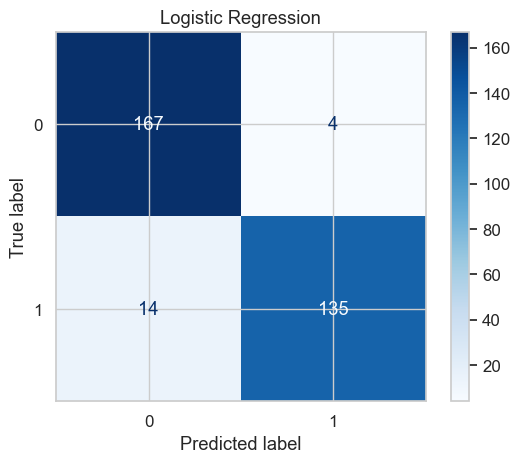

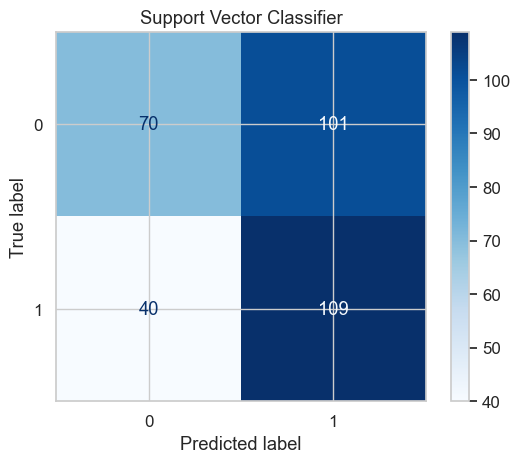

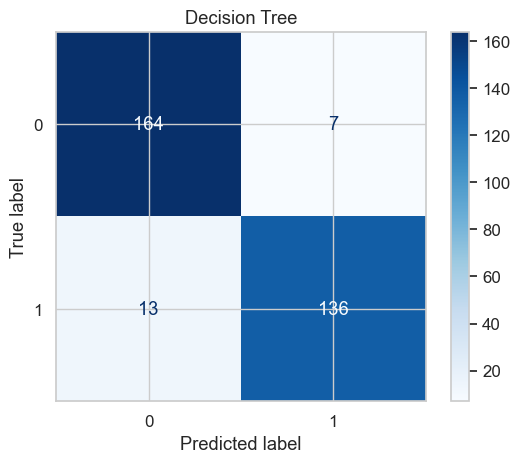

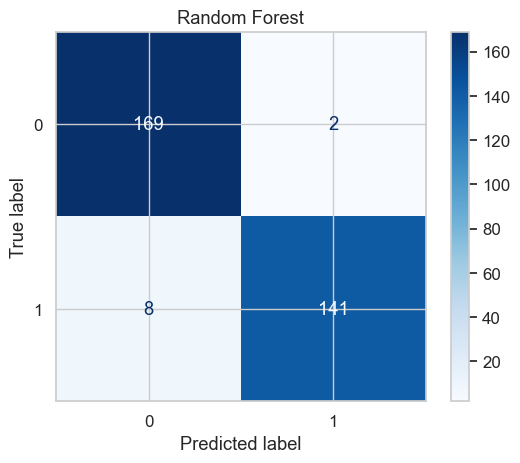

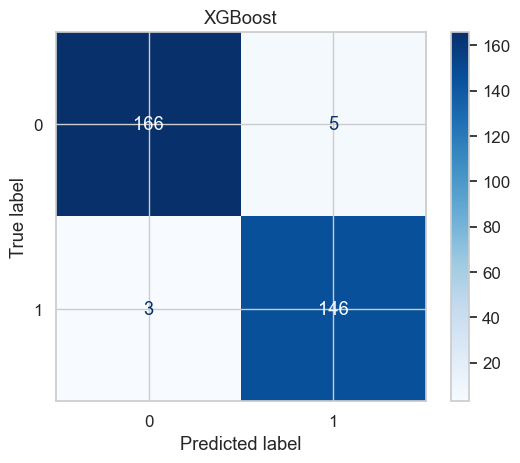

In [23]:
# Confusion Matrix
# Predict on training or test set (better on test set)
log_pred = log_reg.predict(X_test)
svc_pred = svc.predict(X_test)
tree_pred = tree_clf.predict(X_test)
rf_pred = random_forest.predict(X_test)
xgb_pred = xgboost.predict(X_test)

# Create confusion matrices
cm_log = confusion_matrix(y_test, log_pred)
cm_svc = confusion_matrix(y_test, svc_pred)
cm_tree = confusion_matrix(y_test, tree_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

# Function to plot confusion matrix
def plot_cm(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_cm(cm_log, 'Logistic Regression')
plot_cm(cm_svc, 'Support Vector Classifier')
plot_cm(cm_tree, 'Decision Tree')
plot_cm(cm_rf, 'Random Forest')
plot_cm(cm_xgb, 'XGBoost')


## 4.4 ROC Curve

Logistic Regression: 97.71148215170986
Support Vector Classifier: 59.13661018025345
Decision Tree Classifier: 92.40327342794137
Random Forest Classfier: 96.82682139987642
XGBoost Classifier: 97.35908312758407
Logistic Regression: Threshold=0.442, FPR=0.021, TPR=0.911
SVC: Threshold=-0.178, FPR=0.536, TPR=0.728
Decision Tree: Threshold=1.000, FPR=0.041, TPR=0.889
Random Forest: Threshold=1.000, FPR=0.014, TPR=0.951
XGBoost: Threshold=1.000, FPR=0.017, TPR=0.965


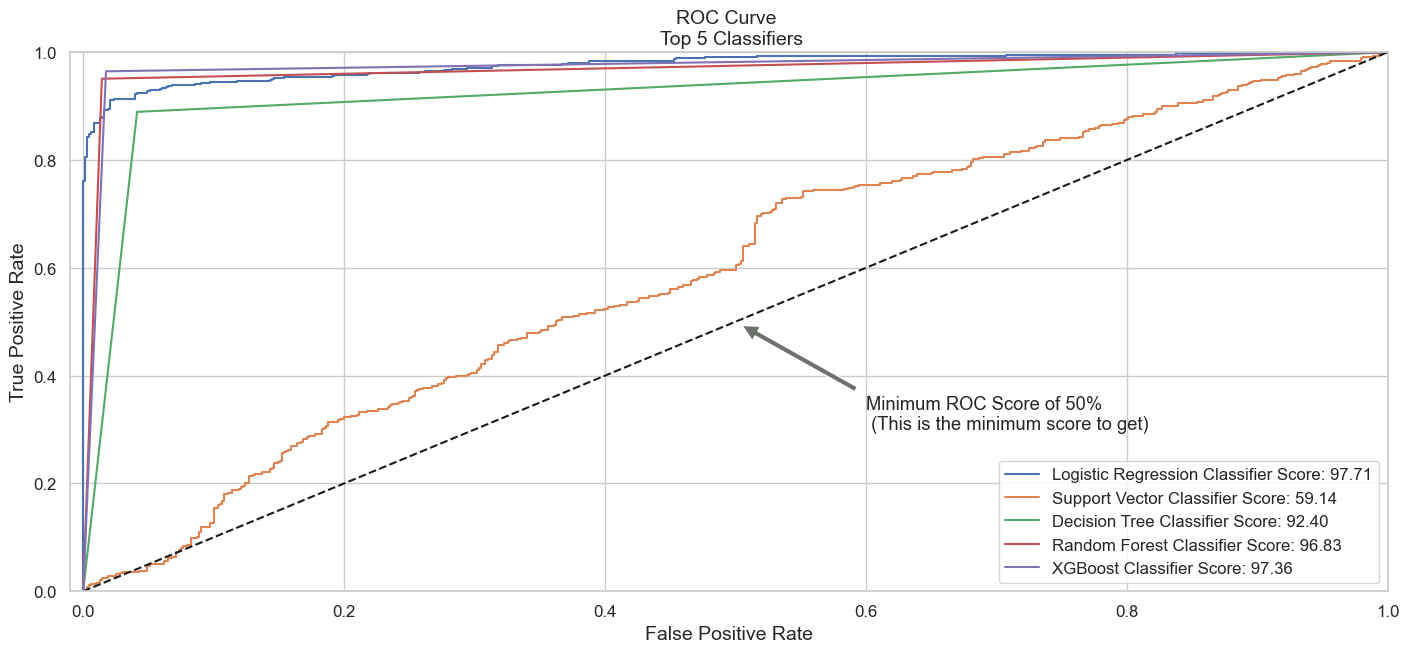

In [24]:
# ROC Curve
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

ran_pred = cross_val_predict(random_forest, X_train, y_train, cv=5)

xgb_pred = cross_val_predict(xgboost, X_train, y_train, cv=5)

print('Logistic Regression:', roc_auc_score(y_train, log_reg_pred)*100)
print('Support Vector Classifier:', roc_auc_score(y_train, svc_pred)*100)
print('Decision Tree Classifier:', roc_auc_score(y_train, tree_pred)*100)
print('Random Forest Classfier:', roc_auc_score(y_train, ran_pred)*100)
print('XGBoost Classifier:', roc_auc_score(y_train, xgb_pred)*100)

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
ran_fpr, ran_tpr, ran_threshold = roc_curve(y_train, ran_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_train, xgb_pred)

def optimal_threshold(fpr, tpr, thresholds):
    J = tpr - fpr
    ix = np.argmax(J)
    return thresholds[ix], fpr[ix], tpr[ix]

# Logistic Regression
log_thresh, log_f, log_t = optimal_threshold(log_fpr, log_tpr, log_thresold)

# Support Vector Classifier
svc_thresh, svc_f, svc_t = optimal_threshold(svc_fpr, svc_tpr, svc_threshold)

# Decision Tree
tree_thresh, tree_f, tree_t = optimal_threshold(tree_fpr, tree_tpr, tree_threshold)

# Random Forest
ran_thresh, ran_f, ran_t = optimal_threshold(ran_fpr, ran_tpr, ran_threshold)

# XGBoost
xgb_thresh, xgb_f, xgb_t = optimal_threshold(xgb_fpr, xgb_tpr, xgb_threshold)

# Print results
print(f"Logistic Regression: Threshold={log_thresh:.3f}, FPR={log_f:.3f}, TPR={log_t:.3f}")
print(f"SVC: Threshold={svc_thresh:.3f}, FPR={svc_f:.3f}, TPR={svc_t:.3f}")
print(f"Decision Tree: Threshold={tree_thresh:.3f}, FPR={tree_f:.3f}, TPR={tree_t:.3f}")
print(f"Random Forest: Threshold={ran_thresh:.3f}, FPR={ran_f:.3f}, TPR={ran_t:.3f}")
print(f"XGBoost: Threshold={xgb_thresh:.3f}, FPR={xgb_f:.3f}, TPR={xgb_t:.3f}")

def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, ran_fpr, ran_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(17,7))
    plt.title('ROC Curve \n Top 5 Classifiers', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.2f}'.format(roc_auc_score(y_train, log_reg_pred)*100))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.2f}'.format(roc_auc_score(y_train, svc_pred)*100))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.2f}'.format(roc_auc_score(y_train, tree_pred)*100))
    plt.plot(ran_fpr, ran_tpr, label='Random Forest Classifier Score: {:.2f}'.format(roc_auc_score(y_train, ran_pred)*100))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.2f}'.format(roc_auc_score(y_train, xgb_pred)*100))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, ran_fpr, ran_tpr, xgb_fpr, xgb_tpr)
plt.show()

# 5 Save the Model

In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pickle.dump(model, open("model.pkl", "wb"))